# Contents
## Importing libraries and data
## Re-running regression analysis from 6.4 on squeaky clean df
## Re-running the clustering analysis from 6.5 on squeaky clean df
## Fixing the dataset for use in Tableau
## Summary statistics for clusters

# Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
import scipy

from datetime import datetime
from pylab import rcParams # This will define a fixed size for all special charts.
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

warnings.filterwarnings("ignore") # Disable deprecation warnings

plt.style.use('fivethirtyeight') 

In [2]:
# Display graphs within the notebook without the need to "call" them specifically

%matplotlib inline

In [3]:
# Turning project folder into string

path = r'C:\Users\davau\OneDrive - College of the Sequoias\Career Foundry\Data Immersion\Achievement 6 (Python and Tableau)\Job Market for Data Analytics'

In [4]:
# Importing stem_salaries_squeaky_clean.csv

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'stem_salaries_squeaky_clean.csv'), index_col = False)

In [5]:
df.head()

,datetime,company,level,title,totalyearlycompensation,location,city,state,country,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
0,2017-06-07,Oracle,L3,Product Manager,127000,"Redwood City, CA",Redwood City,CA,United States of America,1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
1,2017-06-10,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",San Francisco,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2017-06-11,Amazon,L7,Product Manager,310000,"Seattle, WA",Seattle,WA,United States of America,8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2017-06-17,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",Sunnyvale,CA,United States of America,7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
4,2017-06-20,Microsoft,60,Software Engineer,157000,"Mountain View, CA",Mountain View,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Re-running Regression analysis from 6.4 on squeaky clean df

In [6]:
# Creating a correlation matrix using pandas

df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
totalyearlycompensation,1.000000,0.436042,0.167087,0.697334,0.814632,0.482830
yearsofexperience,0.436042,1.000000,0.520948,0.370127,0.285714,0.259077
yearsatcompany,0.167087,0.520948,1.000000,0.142907,0.084086,0.104453
basesalary,0.697334,0.370127,0.142907,1.000000,0.467423,0.389404
stockgrantvalue,0.814632,0.285714,0.084086,0.467423,1.000000,0.236218
bonus,0.482830,0.259077,0.104453,0.389404,0.236218,1.000000


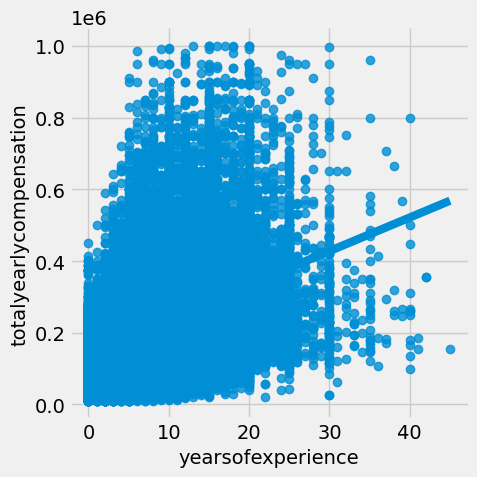

In [7]:
# Creating a scatterplot for 'yearsofexperience' and 'totalyearlycompensation'

sns.lmplot(x = 'yearsofexperience', y = 'totalyearlycompensation', data = df)

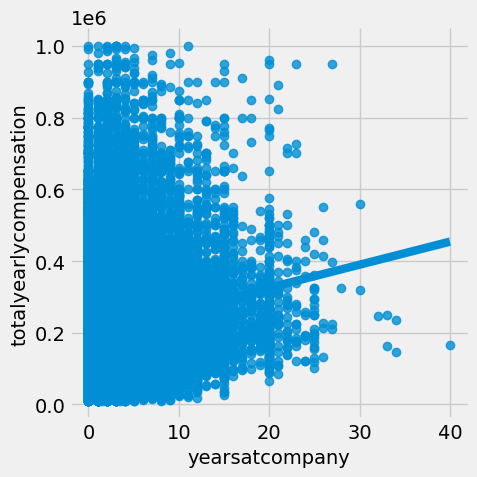

In [8]:
# Creating a scatterplot for 'yearsatcompany' and 'totalyearlycompensation'

sns.lmplot(x = 'yearsatcompany', y = 'totalyearlycompensation', data = df)

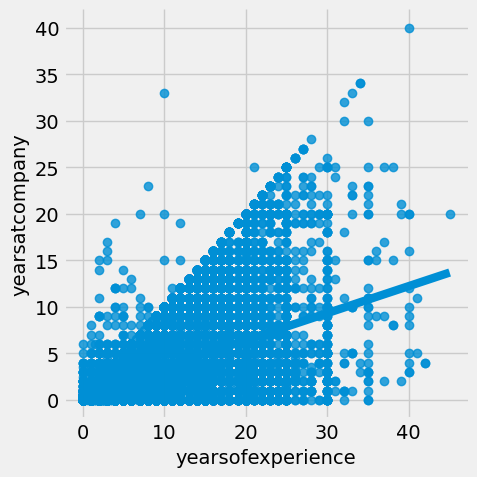

In [9]:
# Creating a scatterplot for 'yearsofexperience' and 'yearsatcompany'

sns.lmplot(x = 'yearsofexperience', y = 'yearsatcompany', data = df)

# Re-running the clustering analysis from 6.5 on squeaky clean df

In [10]:
# Creating a subset of df containing only numerical values

sub = df[['totalyearlycompensation','yearsofexperience','yearsatcompany']]

In [11]:
sub.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany
0,127000,1.5,1.5
1,100000,5.0,3.0
2,310000,8.0,0.0
3,372000,7.0,5.0
4,157000,5.0,3.0


In [12]:
# Standardizing each column

sub['totalyearlycompensation'] = scipy.stats.zscore(sub['totalyearlycompensation'])
sub['yearsofexperience'] = scipy.stats.zscore(sub['yearsofexperience'])
sub['yearsatcompany'] = scipy.stats.zscore(sub['yearsatcompany'])

In [13]:
sub.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany
0,-0.697864,-0.977354,-0.368573
1,-0.914076,-0.375526,0.093690
2,0.767571,0.140326,-0.830837
3,1.264057,-0.031625,0.710041
4,-0.457629,-0.375526,0.093690


### Elbow to determine number of clusters

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 
score

[-187461.0,
 -115187.5783523368,
 -88963.70435509313,
 -72879.5364460493,
 -63453.660107780386,
 -54275.91962389631,
 -48650.97455856215,
 -44854.60626348409,
 -41381.52071406872]

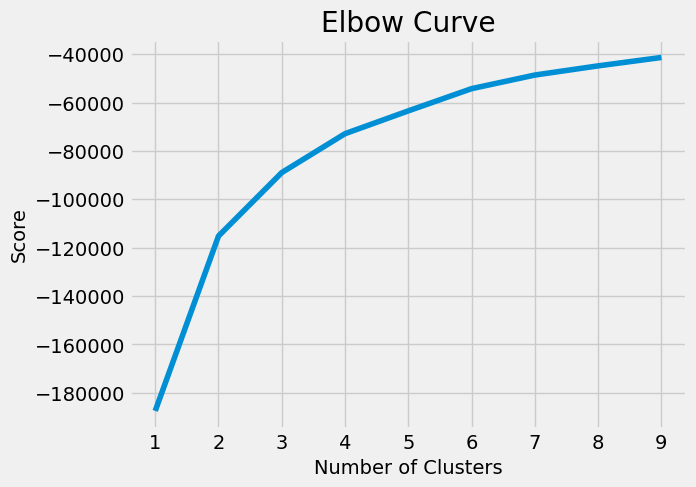

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

It's hard to identify exactly where this curve begins to flatten out.  I will use k=4 clusters, as that is where I would (subjectively) stop calling the slope of the curve "steep."  

### Running the k-means algorithm

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4
                # , n_jobs = -1
               ) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(sub)

KMeans(n_clusters=4)

In [19]:
# Attaching a 'clusters' column to sub

sub['clusters'] = kmeans.fit_predict(sub)

In [20]:
sub.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,clusters
0,-0.697864,-0.977354,-0.368573,3
1,-0.914076,-0.375526,0.093690,3
2,0.767571,0.140326,-0.830837,0
3,1.264057,-0.031625,0.710041,2
4,-0.457629,-0.375526,0.093690,3


In [21]:
sub['clusters'].value_counts()

3    33738
0    17765
2     7231
1     3753
Name: clusters, dtype: int64

### Clustered visualizations

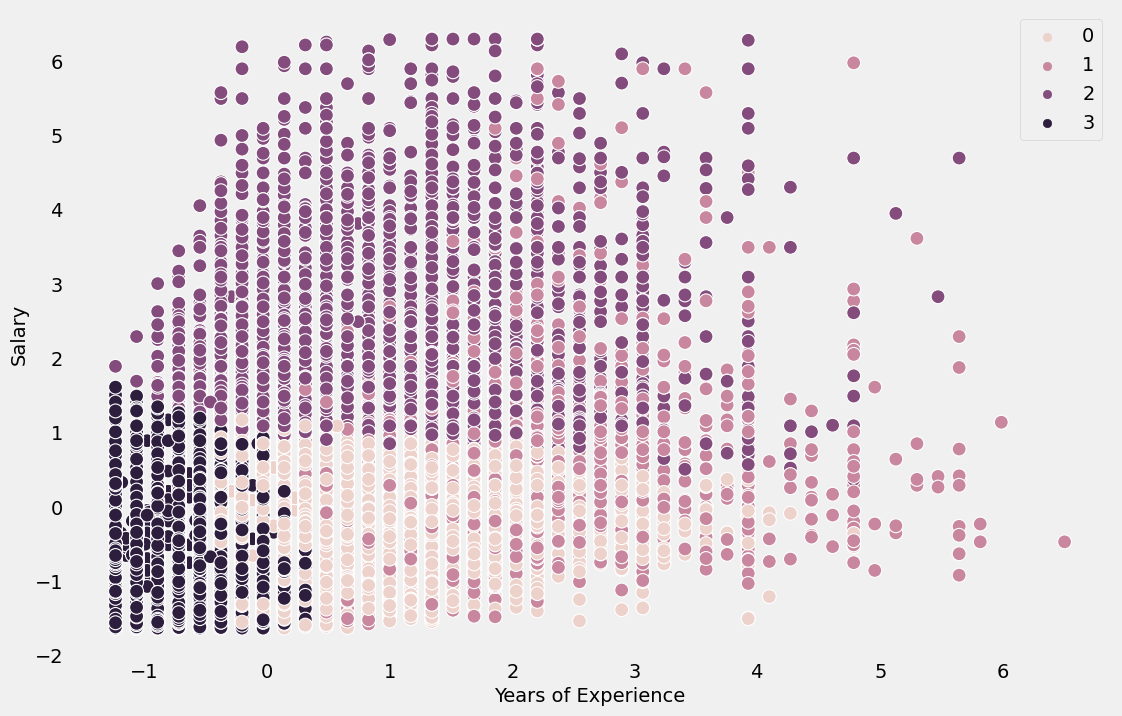

In [22]:
# Plot the clusters for 'totalyearlycompensation' vs 'yearsofexperience'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['yearsofexperience'], y=sub['totalyearlycompensation'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Years of Experience') # Label x-axis.
plt.ylabel('Salary') # Label y-axis.
plt.show()

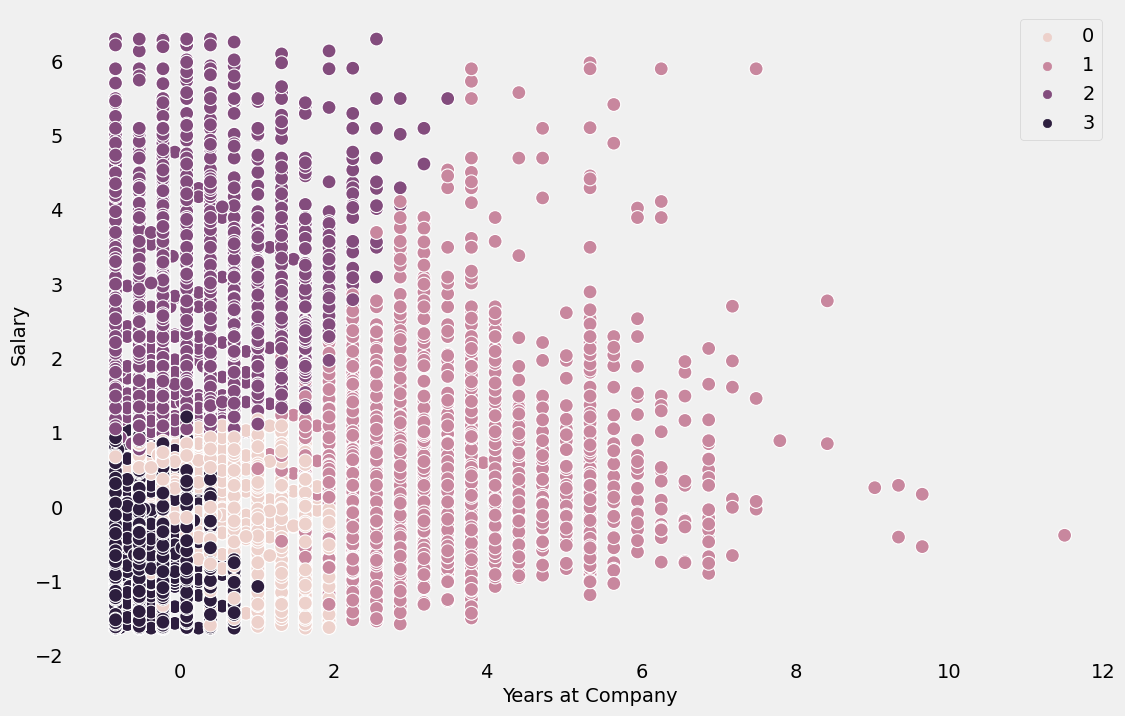

In [23]:
# Plot the clusters for 'totalyearlycompensation' vs 'yearsatcompany'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['yearsatcompany'], y=sub['totalyearlycompensation'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Years at Company')
plt.ylabel('Salary')
plt.show()

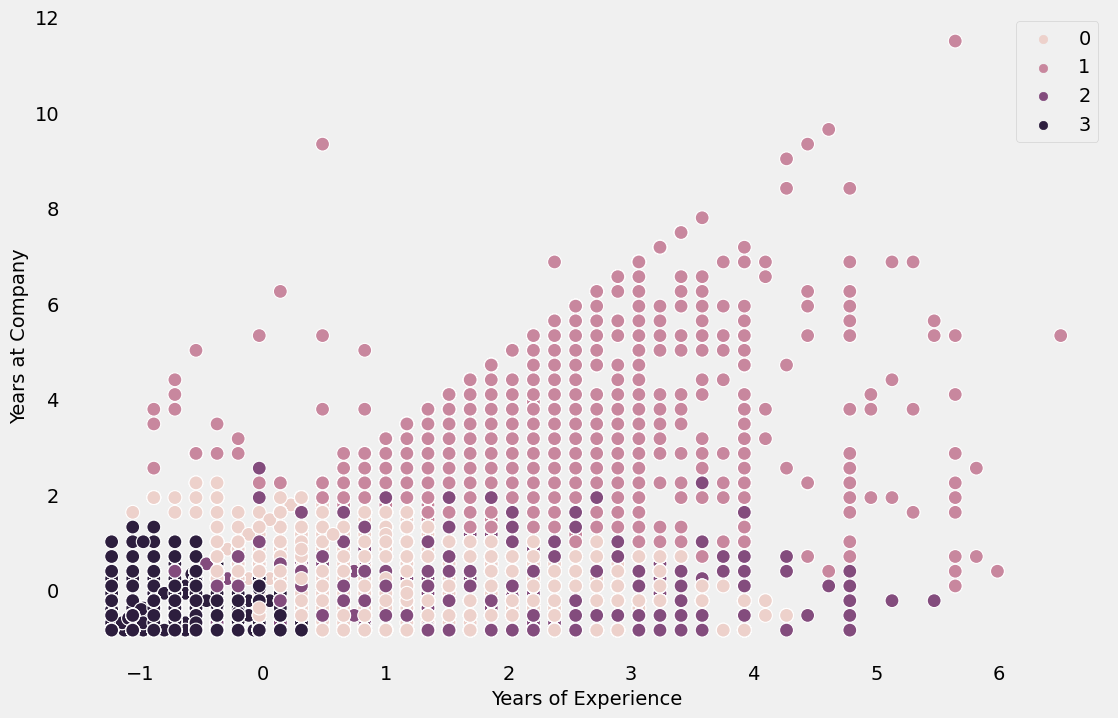

In [24]:
# Plot the clusters for 'yearsatcompany' vs 'yearsofexperience'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['yearsofexperience'], y=sub['yearsatcompany'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Years of Experience')
plt.ylabel('Years at Company')
plt.show()

The 'yearsatcompany' v 'yearsofexperience' graph makes it clear that Cluster 3 (the dark purple cluster) is comprised of individuals who are low in experience, both broadly and within the company at which they are currently employed.  This graph also makes it clear that Cluster 0 (the pink cluster) is comprised of individuals who may have a bit more experience in their industry, but not at their current place of employment.  It is clear from the other two graphs that these two clusters of individuals make the least amount of money.

The 'totalyearlycompensation' vs 'yearsatcompany' graph makes it clear that Cluster 2 is primarily comprised of individuals who have been with their current company for a relatively long time.  The salaries of these individuals has a very wide range, though the lower end of the salary range for this group is noticeable higher than the lower end of the salary ranges for Clusters 0 and 3.  It should also be noted that because these individuals have more years at their companies, they also have more years of experience, generally, though there are exceptions.  (The exceptions could be people who changed departments within a company.)

The 'totalyearlycompensation' vs 'yearsatcompany' graph also makes it clear that Cluster 1 (the light purple cluster) is comprised of individuals with high salaries despite not having many years at their current company.  However, the 'yearsatcompany' vs 'yearsofexperience' graph makes it clear that while these individuals have not been at their current company for very long, their level of experience varies quite widely.  Many of these individuals could be employees with a lot of experience in the field but who have recently changed companies, perhaps in pursuit of more senior-level positions.  This would explain their high salaries.

### Clustered descriptive statistics

In [25]:
# Breaking 'sub' down by cluster

sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'light purple'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 3, 'cluster'] = 'dark purple'

In [26]:
sub.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,clusters,cluster
0,-0.697864,-0.977354,-0.368573,3,dark purple
1,-0.914076,-0.375526,0.093690,3,dark purple
2,0.767571,0.140326,-0.830837,0,pink
3,1.264057,-0.031625,0.710041,2,purple
4,-0.457629,-0.375526,0.093690,3,dark purple


In [27]:
# Calculating mean and median of each column, grouped by cluster

sub.groupby('cluster').agg({'totalyearlycompensation':['mean', 'median'], 
                         'yearsofexperience':['mean', 'median'], 
                         'yearsatcompany':['mean', 'median']})

totalyearlycompensation           yearsofexperience            \
                                mean    median              mean    median   
cluster                                                                      
dark purple                -0.452871 -0.473644         -0.691720 -0.719428   
light purple                0.406151  0.247061          1.654711  1.343981   
pink                       -0.034464 -0.033213          0.614277  0.484228   
purple                      1.986851  1.656441          0.859423  0.656178   

             yearsatcompany            
                       mean    median  
cluster                                
dark purple       -0.458292 -0.522661  
light purple       2.897777  2.559095  
pink               0.280049  0.247778  
purple            -0.053739 -0.214486

Discussion of findings (Step 9):

Dark purple have the least amount of experience, least amount of time at their company, and make the least amount of money.  

Light purple have a little more time at their company but a lot more experience in their field than dark purple, and they make the most money.  Again, these are likely people who have moved into senior-level positions at different companies than they started in.  

Pink have a moderate amount of experience, both at their current company and in their field.  They make more money than dark purple but less than light purple.  
Purple have the most experience of any other cluster, both in their field and at their company.  They make more money than dark purple and pink but less than light purple.  Perhaps this group is comprised of risk-averse individuals who like the security of their current job better than the promise of making more money at a company they may end up hating. 

### Adding the 'clusters' column to the entire df

In [28]:
extracted_col = sub['clusters']

In [29]:
df.insert(1, 'cluster', extracted_col)

In [30]:
df.head()

,datetime,cluster,company,level,title,totalyearlycompensation,location,city,state,country,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
0,2017-06-07,3,Oracle,L3,Product Manager,127000,"Redwood City, CA",Redwood City,CA,United States of America,1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
1,2017-06-10,3,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",San Francisco,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2017-06-11,0,Amazon,L7,Product Manager,310000,"Seattle, WA",Seattle,WA,United States of America,8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2017-06-17,2,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",Sunnyvale,CA,United States of America,7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
4,2017-06-20,3,Microsoft,60,Software Engineer,157000,"Mountain View, CA",Mountain View,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [31]:
# Exporting df as 'stem_salaries_clustered.csv'

df.to_csv(os.path.join(path,'02 Data','Prepared Data','stem_salaries_clustered.csv'))

# Fixing the dataset for use in Tableau

The original timestamp was the unique indentifier.  I need to include that column with the dataset so that I can create an appropriate scatterplot in Tableau.

In [32]:
# Importing a dataset that has the original timestamp.  stem_salaries_fewer_outliers.csv should match, but with timestamp.

df_t = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'stem_salaries_fewer_outliers.csv'), index_col = False)

In [33]:
df.shape

(62487, 20)

In [34]:
df_t.shape

(62487, 18)

Yep, same number of rows.  Good.  Let's put the 'timestamp' column from df_t onto df.

In [35]:
ext_col = df_t['timestamp']

In [36]:
df.insert(1, 'timestamp', ext_col)

In [37]:
df.head()

,datetime,timestamp,cluster,company,level,title,totalyearlycompensation,location,city,state,...,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
0,2017-06-07,6/7/2017 11:33:27,3,Oracle,L3,Product Manager,127000,"Redwood City, CA",Redwood City,CA,...,1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
1,2017-06-10,6/10/2017 17:11:29,3,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",San Francisco,CA,...,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2017-06-11,6/11/2017 14:53:57,0,Amazon,L7,Product Manager,310000,"Seattle, WA",Seattle,WA,...,8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2017-06-17,6/17/2017 0:23:14,2,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",Sunnyvale,CA,...,7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
4,2017-06-20,6/20/2017 10:58:51,3,Microsoft,60,Software Engineer,157000,"Mountain View, CA",Mountain View,CA,...,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [38]:
# Exporting df as stem_salaries_final.csv

df.to_csv(os.path.join(path,'02 Data','Prepared Data','stem_salaries_final.csv'))

# Summary Stats for Clusters

In [39]:
# Calculating mean and median of each column, grouped by cluster

df.groupby('cluster').agg({'totalyearlycompensation':['mean', 'median'], 
                         'yearsofexperience':['mean', 'median'], 
                         'yearsatcompany':['mean', 'median']})

totalyearlycompensation           yearsofexperience         \
                           mean    median              mean median   
cluster                                                              
0                 209843.855896  210000.0         10.756319   10.0   
1                 264866.773248  245000.0         16.807088   15.0   
2                 462260.821463  421000.0         12.181994   11.0   
3                 157594.164029  155000.0          3.161137    3.0   

        yearsatcompany         
                  mean median  
cluster                        
0             3.604717    3.5  
1            12.098987   11.0  
2             2.521608    2.0  
3             1.208873    1.0